# Clustering methods

```{note}
You can try this notebook in you browser: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/martinfleis/clustergram/HEAD?filepath=doc%2Fnotebooks%2Fmethods.ipynb)
```

## Scikit-learn, SciPy and RAPIDS cuML backends

Clustergram offers three backends for the computation - `scikit-learn` and `scipy` which use CPU and RAPIDS.AI `cuML`, which uses GPU. Note that all are optional dependencies but you will need at least one of them to generate clustergram.

Let's load the data on Palmer penguins dataset. See the [Introduction](introduction) for its overview.

In [1]:
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram

df = seaborn.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

seaborn.set(style='whitegrid')

Using `scikit-learn` (default):

In [2]:
cgram = Clustergram(range(1, 8), backend="sklearn")
cgram.fit(data)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.023579120635986328 seconds.
K=3 fitted in 0.0060520172119140625 seconds.
K=4 fitted in 0.0069539546966552734 seconds.
K=5 fitted in 0.007315158843994141 seconds.
K=6 fitted in 0.0076100826263427734 seconds.
K=7 fitted in 0.009104251861572266 seconds.


/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

Using `cuML`:

In [4]:
cgram = Clustergram(range(1, 8), backend='cuML')
cgram.fit(data)

`data` can be all data types supported by the selected backend (including `cudf.DataFrame` or `cupy.ndarray` with `cuML` backend).

## Supported methods

Clustergram currently supports K-Means, Mini Batch K-Means, Gaussian Mixture Model and SciPy's hierarchical clustering methods. Note tha GMM and Mini Batch K-Means are supported only for `scikit-learn` backend and hierarchical methods are supported only for `scipy` backend.

Using K-Means (default):

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.013150930404663086 seconds.
K=3 fitted in 0.017735958099365234 seconds.
K=4 fitted in 0.014983892440795898 seconds.
K=5 fitted in 0.012951135635375977 seconds.
K=6 fitted in 0.012308835983276367 seconds.
K=7 fitted in 0.010998249053955078 seconds.


/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

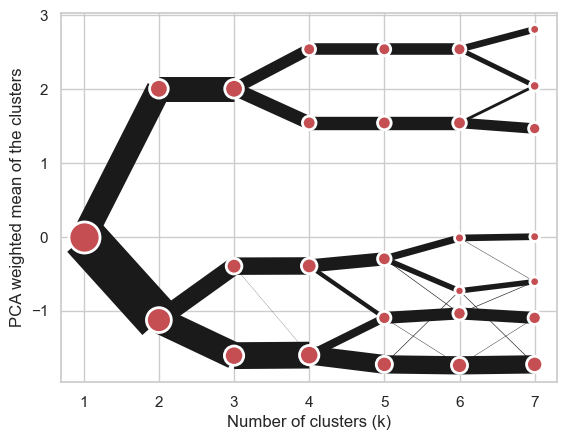

In [5]:
cgram = Clustergram(range(1, 8), method='kmeans')
cgram.fit(data)
cgram.plot()

Using Mini Batch K-Means, which can provide significant speedup over K-Means:

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.014315128326416016 seconds.
K=3 fitted in 0.01651477813720703 seconds.
K=4 fitted in 0.013161182403564453 seconds.
K=5 fitted in 0.011796951293945312 seconds.
K=6 fitted in 0.011163711547851562 seconds.
K=7 fitted in 0.007458925247192383 seconds.


/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

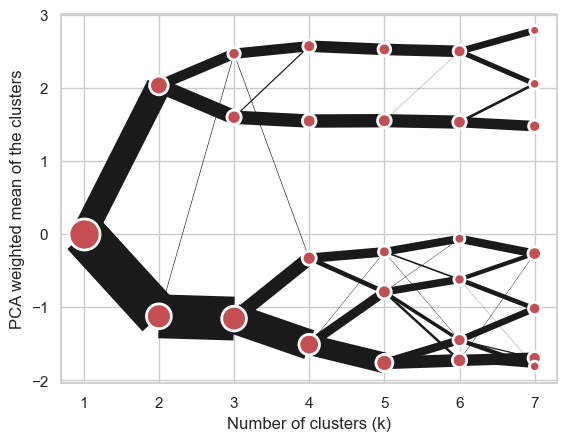

In [6]:
cgram = Clustergram(range(1, 8), method='minibatchkmeans', batch_size=100)
cgram.fit(data)
cgram.plot()

Using Gaussian Mixture Model:


K=1 fitted in 0.00524592399597168 seconds.
K=2 fitted in 0.006797075271606445 seconds.
K=3 fitted in 0.014928102493286133 seconds.
K=4 fitted in 0.008274316787719727 seconds.
K=5 fitted in 0.008157968521118164 seconds.
K=6 fitted in 0.009337186813354492 seconds.
K=7 fitted in 0.009373903274536133 seconds.


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

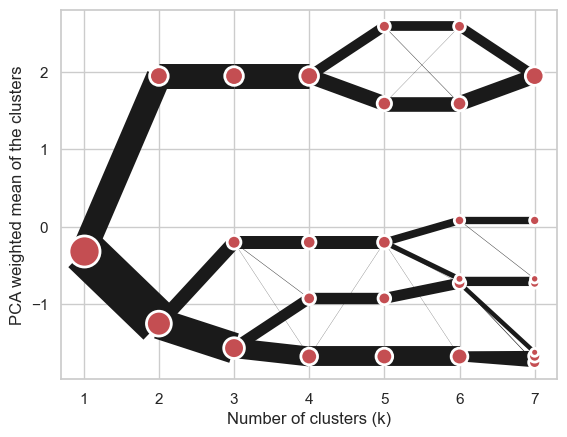

In [7]:
cgram = Clustergram(range(1, 8), method='gmm')
cgram.fit(data)
cgram.plot()

Using Ward's hierarchical clustering:

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

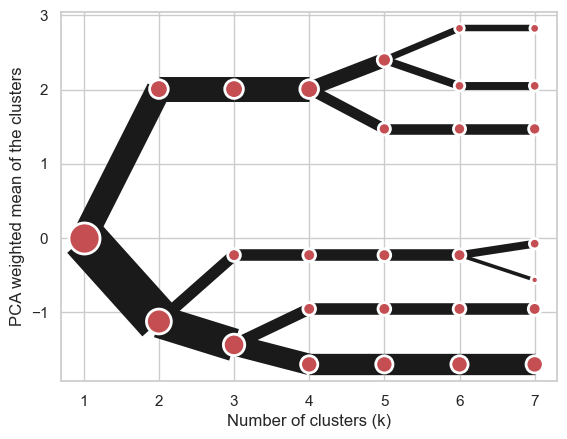

In [8]:
cgram = Clustergram(range(1, 8), method='hierarchical', linkage='ward')
cgram.fit(data)
cgram.plot()

## Manual input

Alternatively, you can create clustergram using `from_data` or  `from_centers` methods based on alternative clustering algorithms.

Using `Clustergram.from_data` which creates cluster centers as mean or median values:

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

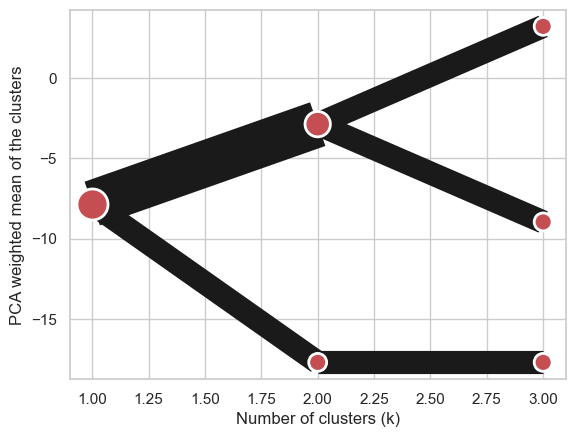

In [9]:
import numpy
import pandas

data = numpy.array([[-1, -1, 0, 10], [1, 1, 10, 2], [0, 0, 20, 4]])
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})

cgram = Clustergram.from_data(data, labels)
cgram.plot()

Using `Clustergram.from_centers` based on explicit cluster centers.:

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='Mean of the clusters'>

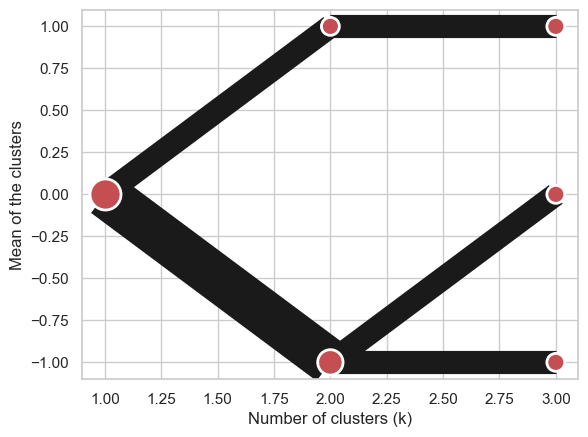

In [10]:
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})
centers = {
            1: numpy.array([[0, 0, 0]]),
            2: numpy.array([[-1, -1, -1], [1, 1, 1]]),
            3: numpy.array([[-1, -1, -1], [1, 1, 1], [0, 0, 0]]),
        }
cgram = Clustergram.from_centers(centers, labels)
cgram.plot(pca_weighted=False)

To support PCA weighted plots with clustergram created from centers you also need to pass data:

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

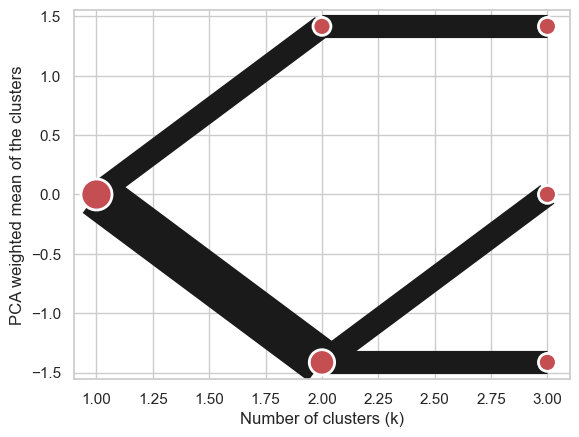

In [11]:
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})
centers = {
    1: numpy.array([[0, 0]]),
    2: numpy.array([[-1, -1], [1, 1]]),
    3: numpy.array([[-1, -1], [1, 1], [0, 0]]),
}
data = numpy.array([[-1, -1], [1, 1], [0, 0]])
cgram = Clustergram.from_centers(centers, labels, data=data)
cgram.plot(pca_weighted=True)